In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [75]:
#behav = pd.read_csv('C:/Users/Wonn/Documents/GitHub/ML-For-Beginners/Photometry/data/300behavior.csv')
behav = pd.read_csv('C:/Users/wonnp/Documents/GitHub/ML-For-Beginners/Photometry/data/100to300behavior.csv')


removeOmits = behav[behav['Lever'] != 0]


In [76]:
removeOmits['Lever'] = removeOmits['Lever'].replace(1, 0)
removeOmits['Lever'] = removeOmits['Lever'].replace(3, 1)
removeOmits['Lever'] = removeOmits['Lever'].replace(2, 1)

ex29 = removeOmits[removeOmits['ID'] != 29]

df = ex29[(ex29['Trial#'] > 20) & ~(ex29['Trial#'].isin([40, 60]))]

df.head


<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230109      21      1          2     1   1.327565  -2.075430   
21    16  230109      22      1          3     4   1.013489  -0.201105   
22    16  230109      23      1          3     1   1.279473   0.466496   
23    16  230109      24      1          3     1   0.922766  -2.325989   
24    16  230109      25      1          3     1   0.928536  -2.505650   
...   ..     ...     ...    ...        ...   ...        ...        ...   
4978  32  230407      51      1          1     3   3.332265  -1.602789   
4979  32  230407      52      0          0     0   4.506867  -2.054242   
4980  32  230407      55      0          2     0   0.637471  -3.201188   
4981  32  230407      56      1          0     2   2.911747  -0.353442   
4982  32  230407      59      0          0     0   1.568098  -1.403199   

        LeverAUC    HLZmax    HLZmin       HLAUC  
20    -74.113150  3.140363 -2.

In [81]:

feature_names = ['Trial#','HLZmax','HLZmin','HLAUC','Lever'] 
df_filtered = df[feature_names]


In [82]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' and a target variable 'target'

# Splitting data into features and target
X = df_filtered.drop('Lever', axis=1)  # Replace 'target' with your target column name
y = df_filtered['Lever']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (important for logistic regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Creating the SVM model
# 'class_weight='balanced'' will automatically adjust weights inversely proportional to class frequencies
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)

# Fitting the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Making predictions on the test data
y_pred = svm_model.predict(X_test_scaled)
probabilities = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class

# Evaluating the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.70      0.17        60
           1       0.95      0.45      0.61       698

    accuracy                           0.47       758
   macro avg       0.52      0.57      0.39       758
weighted avg       0.88      0.47      0.57       758

Confusion Matrix:
[[ 42  18]
 [385 313]]


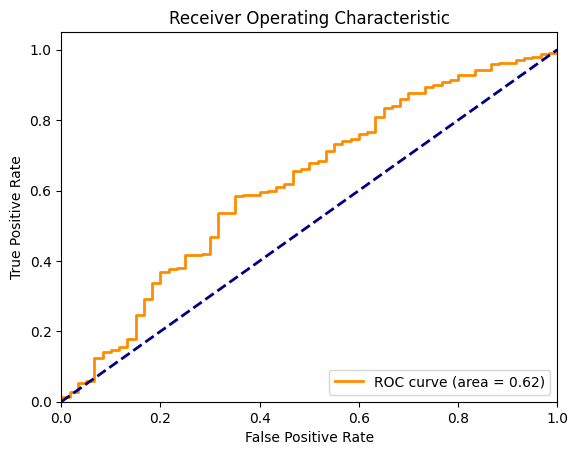

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming rf_model is your trained classifier
# and X_test, y_test are your test dataset and labels

# Get predicted probabilities for the positive class
y_score = svm_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)  # Adjust pos_label if necessary
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

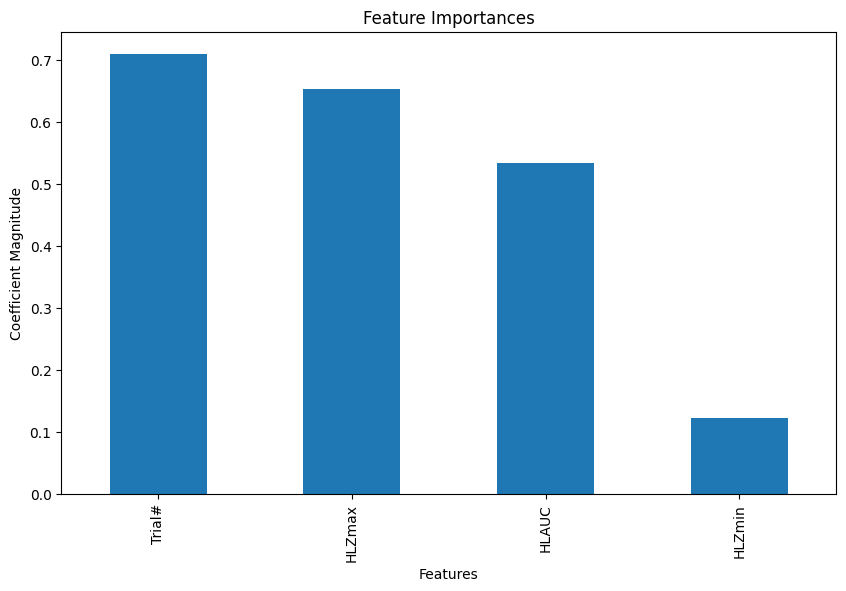

In [80]:
# Assuming 'svm_model' is your trained linear SVM model
coefficients = svm_model.coef_[0]  # For binary classification
import pandas as pd

# Assuming 'feature_names' is a list of your feature names
features = ['Trial#','HLZmax','HLZmin', 'HLAUC']
feature_importance = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

import matplotlib.pyplot as plt

# Sorting the features by the magnitude of their coefficients
sorted_features = feature_importance.abs().sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_features['Coefficient'].plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.show()


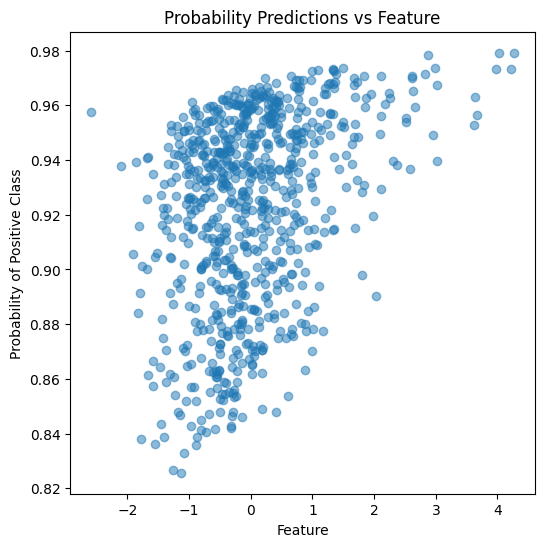

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a feature for the x-axis
feature_for_x_axis = X_test_scaled[:,1]  # Replace 'feature_name' with your chosen feature

# Sorting the values for better visualization
sorted_indices = np.argsort(feature_for_x_axis)
sorted_feature = feature_for_x_axis[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]

# Plotting
plt.figure(figsize=(6,6))
plt.scatter(sorted_feature, sorted_probabilities, alpha=0.5)
plt.xlabel('Feature')
plt.ylabel('Probability of Positive Class')
plt.title('Probability Predictions vs Feature')
plt.show()


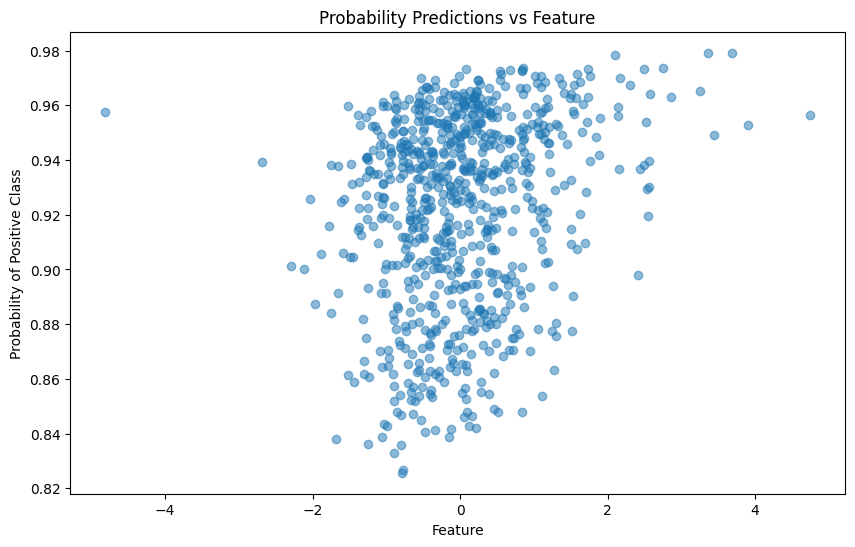

In [74]:
# Choose a feature for the x-axis
feature_for_x_axis = X_test_scaled[:,3]  # Replace 'feature_name' with your chosen feature

# Sorting the values for better visualization
sorted_indices = np.argsort(feature_for_x_axis)
sorted_feature = feature_for_x_axis[sorted_indices]
sorted_probabilities = probabilities[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(sorted_feature, sorted_probabilities, alpha=0.5)
plt.xlabel('Feature')
plt.ylabel('Probability of Positive Class')
plt.title('Probability Predictions vs Feature')
plt.show()


In [101]:
df[df['Lever'] == 1].mean()


ID               19.063636
Date         230178.654545
Trial#           44.245455
Lever             1.000000
NextLever         0.381818
WSLS              0.000000
LeverZmax         1.303410
LeverZmin        -1.747019
LeverAUC        -22.034998
HLZmax            2.134486
HLZmin           -1.283321
HLAUC            42.258055
dtype: float64